# Test - Cutoff 1 (4x4 and 5x5)

In [1]:
from sklearn.pipeline import Pipeline
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointcorrelation,auto_correlation,correlations_multiple,center_slice,two_point_stats
import numpy as np

In [2]:
import dask.array as da

In [3]:
    >>> x_data1 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0],
    ...                       [1, 1, 0 ,1],
    ...                       [1, 1, 0 ,1]]])
    >>> x_data2 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0],
                              [1, 1, 1 ,1 ,0]]])
    >>> x_data3 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0]]])
    >>> x_data4 = np.asarray([[[1, 1, 0 ,1 ],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    >>> x_data5 = np.repeat(x_data4[:,:,:,np.newaxis],4,axis=3)
    

In [4]:
    >>> x_data6 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    print(x_data6.shape)

(1, 5, 4)


In [5]:
print(x_data1.shape)
print(x_data2.shape)
print(x_data3.shape)
print(x_data4.shape)
print(x_data5.shape)


(1, 4, 4)
(1, 5, 5)
(1, 4, 5)
(1, 5, 4)
(1, 5, 4, 4)


In [6]:
x_data=np.asanyarray([np.random.rand(10,10)])

In [7]:
chunks = x_data.shape

In [8]:
x_data = da.from_array(x_data, chunks=chunks)

In [9]:
f_data = auto_correlation(x_data)

In [10]:
center_slice(f_data,1)[0].compute()


array([[0.20678155, 0.21624149, 0.20011817],
       [0.22471161, 0.30434314, 0.22471161],
       [0.20011817, 0.21624149, 0.20678155]])

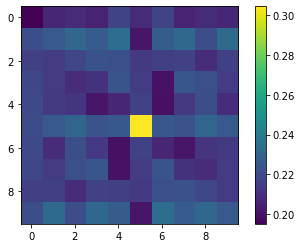

In [11]:
import matplotlib.pyplot as plt
plt.imshow(f_data[0])
plt.colorbar()

dask.array<getitem, shape=(1, 4, 4), dtype=float64, chunksize=(1, 4, 4), chunktype=numpy.ndarray>


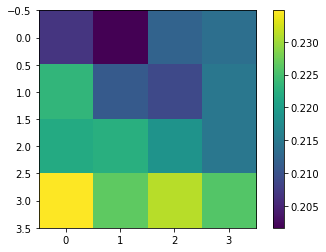

In [21]:
stats=two_point_stats(x_data,x_data,cutoff=9)

print(stats)
plt.imshow(stats[0])
plt.colorbar()


(1, 10, 10)


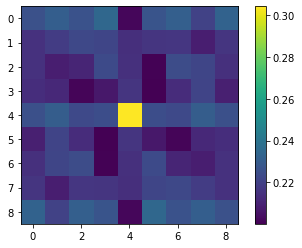

In [13]:
print(x_data.shape)
conj=1-x_data
arrays=[x_data,conj]
data=np.stack(arrays,axis=3)
stats=correlations_multiple(data,correlations=[[0,0]], cutoff=4)


plt.imshow(stats[0,:,:,0])
plt.colorbar()

In [14]:
Sez=x_data1
chunks2 = x_data1.shape
x_data1 = da.from_array(x_data1, chunks=chunks2)

In [15]:
import matplotlib.pyplot as plt
stats=two_point_stats(x_data1,x_data1, cutoff=2)




In [16]:
print(stats.compute())
Sez

[[[0.375 0.375 0.375 0.375]
  [0.375 0.375 0.375 0.375]
  [0.375 0.375 0.625 0.375]
  [0.375 0.375 0.375 0.375]]]


array([[[1, 1, 0, 1],
        [0, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 1, 0, 1]]])

In [17]:
center_slice(f_data,1)[0].compute()

array([[0.20678155, 0.21624149, 0.20011817],
       [0.22471161, 0.30434314, 0.22471161],
       [0.20011817, 0.21624149, 0.20678155]])

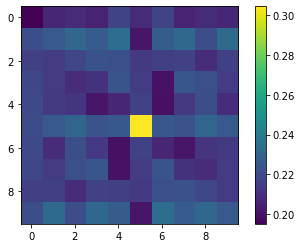

In [18]:
plt.imshow(f_data[0])
plt.colorbar()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

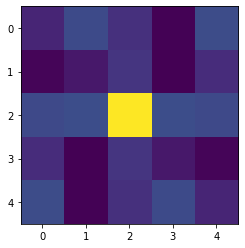

In [19]:
plt.imshow(center_slice(f_data,2)[0])
plt.colorbar

In [20]:
    >>> a = np.arange(16).reshape(1, 4, 4)
    >>> print(center_slice(a, 2).shape)

(1, 4, 4)


# Tasks
* Odd check
* Even Check
* 1D Check
* 2D Check
* 3D Check 